<h1>In this python 3 notebook I will demonstrate an exploratory data analysis on metrics from a Facebook advertising campaign</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date
import openpyxl

In [2]:
wb = openpyxl.load_workbook('Analyst_test.xlsx')

In [3]:
ws = pd.DataFrame(wb['working'].values)

In [4]:
wx = pd.read_csv('working.csv', parse_dates=[0])

In [5]:
wx.head()

,Date,Lifetime Total Likes,Daily New Likes,Daily Unlikes,Daily Net Likes,Daily Page Engaged Users,28 Days Page Engaged Users,Daily Total Reach,Weekly Total Reach,28 Days Total Reach,...,28 Days Negative Feedback From Users,Daily Total Video Views,Daily Total Auto-Played Views,Weekly Total Auto-Played Views,Daily Total Clicked Views,Weekly Total Clicked Views,Daily Video Repeats,Weekly Video Repeats,Daily Total Unique Video Views,Weekly Total Unique Video Views
0,1/1/00,190507,1048,52,996,54449,1118483,871426,3627517,7127058,...,2761,345257,314905,2514381,30352,226718,97482,1223453,247775,1517646
1,1/2/00,191548,1056,48,1008,51108,1127439,862769,3494386,7087874,...,2765,339063,310583,2486859,28480,226652,100720,1237540,238343,1475971
2,1/3/00,192451,940,48,892,48245,1115617,839584,3485314,7114613,...,2774,325737,301017,2494358,24720,226760,90384,1284136,235353,1436981
3,1/4/00,193205,742,42,700,37889,1127344,659099,3374260,7075492,...,2762,247527,228501,2361114,19026,216805,65027,1189839,182500,1388081
4,1/5/00,193952,780,44,736,35876,1132359,655343,3174687,7067471,...,2756,237358,219887,2117788,17472,191159,65889,1042335,171470,1266611


<p>Make a database of just the daily category</p>

In [6]:
wc = wx[['Date', 'Daily New Likes', 'Daily Unlikes', 'Daily Net Likes', 
         'Daily Page Engaged Users', 'Daily Total Reach','Daily Total Impressions', 'Daily Total Consumers',
        'Daily Page Consumptions', 'Daily Negative Feedback', 'Daily Negative Feedback From Users', 'Daily Total Video Views',
         'Daily Total Auto-Played Views', 'Daily Total Clicked Views', 'Daily Video Repeats','Daily Total Unique Video Views']]

In [7]:
wc.columns

Index(['Date', 'Daily New Likes', 'Daily Unlikes', 'Daily Net Likes',
       'Daily Page Engaged Users', 'Daily Total Reach',
       'Daily Total Impressions', 'Daily Total Consumers',
       'Daily Page Consumptions', 'Daily Negative Feedback',
       'Daily Negative Feedback From Users', 'Daily Total Video Views',
       'Daily Total Auto-Played Views', 'Daily Total Clicked Views',
       'Daily Video Repeats', 'Daily Total Unique Video Views'],
      dtype='object')

In [8]:
wc.describe()

,Daily New Likes,Daily Unlikes,Daily Net Likes,Daily Page Engaged Users,Daily Total Reach,Daily Total Impressions,Daily Total Consumers,Daily Page Consumptions,Daily Negative Feedback,Daily Negative Feedback From Users,Daily Total Video Views,Daily Total Auto-Played Views,Daily Total Clicked Views,Daily Video Repeats,Daily Total Unique Video Views
count,185.000000,185.000000,185.000000,185.000000,1.850000e+02,1.850000e+02,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,797.740541,56.735135,741.005405,46929.416216,7.589971e+05,1.651830e+06,39485.724324,62128.578378,74.816216,88.075676,298630.859459,275974.248649,22657.081081,72661.789189,225969.600000
std,470.768599,11.524082,461.262487,24064.426547,2.913368e+05,6.950579e+05,20380.592012,31877.052153,31.912734,37.973599,133462.548299,124499.907304,9562.117663,32577.513505,103034.444623
min,204.000000,36.000000,155.000000,13738.000000,2.495730e+05,5.169790e+05,11658.000000,20173.000000,21.000000,24.000000,95999.000000,86389.000000,8273.000000,23654.000000,67536.000000
25%,473.000000,49.000000,429.000000,30625.000000,5.518030e+05,1.134357e+06,25109.000000,39595.000000,53.000000,61.000000,196513.000000,181723.000000,15365.000000,47017.000000,150544.000000
50%,702.000000,55.000000,643.000000,41513.000000,7.201630e+05,1.566157e+06,34932.000000,55748.000000,71.000000,84.000000,271750.000000,250041.000000,21986.000000,67665.000000,202820.000000
75%,974.000000,61.000000,915.000000,54595.000000,9.228380e+05,2.031270e+06,46503.000000,73255.000000,92.000000,108.000000,347990.000000,322339.000000,27856.000000,88893.000000,270633.000000
max,2774.000000,97.000000,2683.000000,146280.000000,1.689771e+06,4.100609e+06,123408.000000,194611.000000,194.000000,227.000000,756834.000000,701506.000000,60540.000000,178836.000000,579962.000000


<p>Describe helps us take a quick snapshot of our database, another good overview of our data would be a heatmap to see how all of our metrics relate to each other.</p>

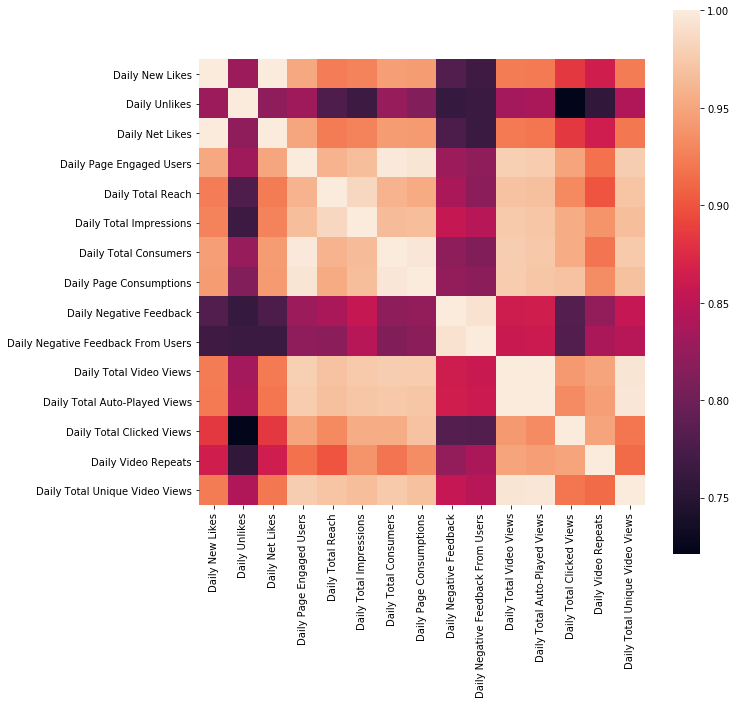

In [9]:
corr=wc.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, square=True)

<p>This heatmap shows the variables in our data and how they are correlated to each other.</p><p> We can also show the highest correlated variables with the Daily Total Consumers metric.</p>

In [10]:
wc.corr()['Daily Total Consumers'].sort_values(ascending=False)

Daily Total Consumers                 1.000000
Daily Page Engaged Users              0.998691
Daily Page Consumptions               0.996006
Daily Total Video Views               0.977857
Daily Total Unique Video Views        0.975968
Daily Total Auto-Played Views         0.974898
Daily Total Impressions               0.965140
Daily Total Reach                     0.958857
Daily Total Clicked Views             0.955077
Daily New Likes                       0.945124
Daily Net Likes                       0.943971
Daily Video Repeats                   0.919311
Daily Unlikes                         0.826143
Daily Negative Feedback               0.820817
Daily Negative Feedback From Users    0.812183
Name: Daily Total Consumers, dtype: float64

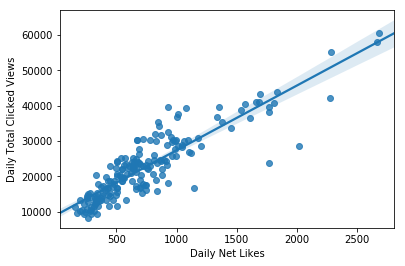

In [11]:
sns.regplot(x='Daily Net Likes', y='Daily Total Clicked Views', data=wc)

<p>This a plot that shows a positive correlation between Total Clicked Views of videos and Net Likes. More people were likely to click like and engage with the page in some way</p>

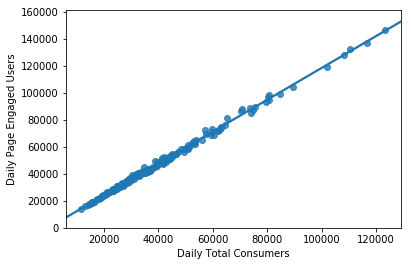

In [12]:
sns.regplot(x='Daily Total Consumers', y='Daily Page Engaged Users', data=wc)

<p>As the consumers increased so did the engagement of the users</p>

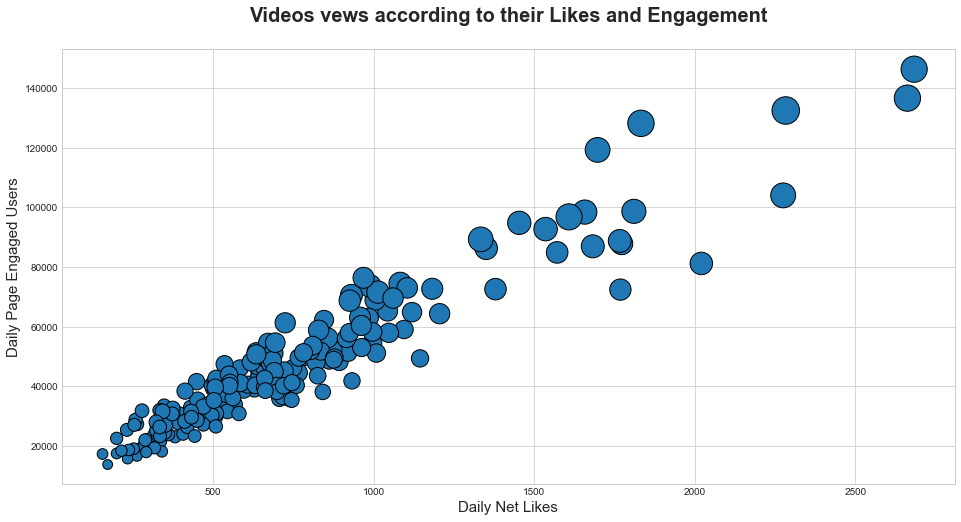

In [13]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Videos vews according to their Likes and Engagement', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Daily Net Likes', fontsize=15)
plt.ylabel('Daily Page Engaged Users', fontsize=15)

likes = wc["Daily Net Likes"].values
engagement = wc["Daily Page Engaged Users"].values
views = wc["Daily Total Video Views"].values

plt.scatter(likes, engagement, s = views/1000, edgecolors='black')
plt.show()